In [1]:
import strongholds
import strongholds.graphing as mplt

import numpy as np

import matplotlib.pyplot as plt

fixed_rng = np.random.default_rng(0)

While standard triangulation techniques require throwing two Eyes of Ender to find a stronghold, the speedrunning mod [Ninjabrain Bot](https://github.com/Ninjabrain1/Ninjabrain-Bot) can find strongholds in as few as one throw. In these notebooks, we use interactive graphs and Monte Carlo methods to show how this mod works and supplement its existing [derivation](https://github.com/Ninjabrain1/Ninjabrain-Bot/blob/main/triangulation.pdf).

To use these interactive graphs, you will need to clone this repository and run this notebook for yourself.

### Introduction
In Java Edition, [strongholds](https://minecraft.wiki/w/Stronghold#Java_Edition) are generated in eight rings of set thickness and distance from the world origin.

As part of the generation process, strongholds are "snapped" to the center of a chunk (the 8, 8 coordinates) - as such, there are only a finite (but large) number of grid points that a stronghold can be placed.

Locations within the first ring rings are shown below; zooming in on the graph makes the discrete grid structure more apparent.

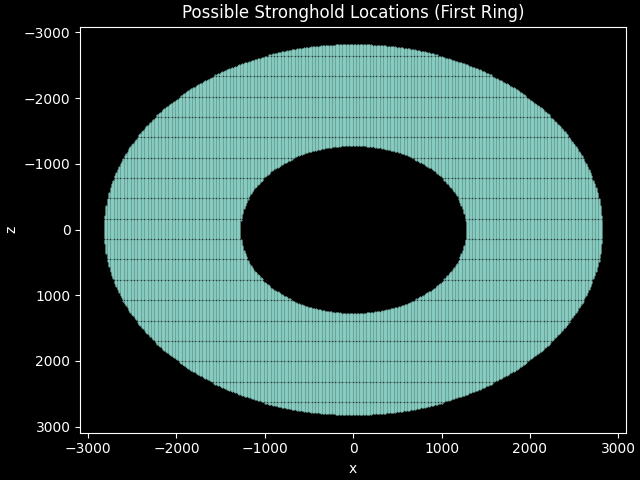

In [2]:
%matplotlib widget

fig1, ax1 = mplt.xz_subplots()
ax1.set_title("Possible Stronghold Locations (First Ring)")

grid = strongholds.generation_grid(ring_nums=range(1))
ax1.scatter(grid.real, grid.imag, s=0.2)

mplt.flip_zaxis(ax1)

As described on the wiki, each ring has a set amount of strongholds in them, for a total of 128 rings in total. In most cases, players will find themselves visiting the first point.

In [4]:
player = strongholds.rectpoint(3000, -300)

all_strongholds = strongholds.generate_all(rng=fixed_rng)

target = strongholds.closest_stronghold(player, all_strongholds)
print("Closest stronghold to (3000, -300):", strongholds.math.to_xz(target))

array([2168.,  328.])

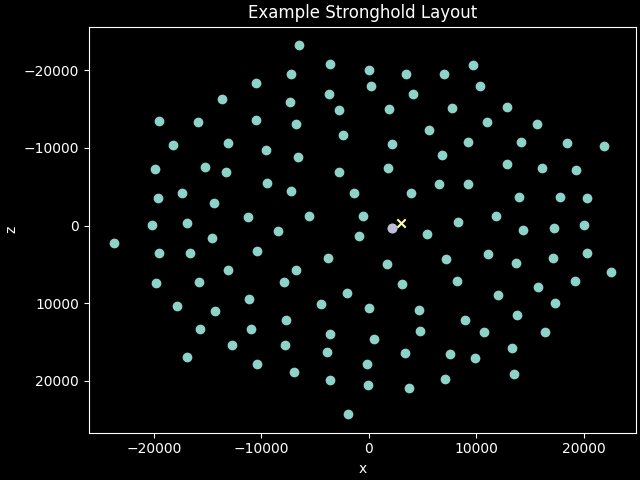

In [5]:
fig2, ax2 = mplt.xz_subplots()
ax2.set_title("Example Stronghold Distribution")

ax2.scatter(all_strongholds.real, all_strongholds.imag)
ax2.scatter(player.real, player.imag, marker="x")
ax2.scatter(target.real, target.imag)

mplt.flip_zaxis(ax2)

In [6]:
throw_angle = strongholds.math.angle(target - player)
throw_angle

2.4950217156062884

In [7]:
grid = strongholds.generation_grid(range(2))
possible_targets = strongholds.points_in_cone(player, grid, throw_angle, 1e-4, error_is_relative=False)
possible_targets

array([ 2168. +328.j,  1384. +920.j,  1320. +968.j,   536.+1560.j,
         472.+1608.j,  -248.+2152.j,  -312.+2200.j,  -376.+2248.j,
        -440.+2296.j, -2664.+3976.j, -2728.+4024.j, -2792.+4072.j,
       -2856.+4120.j, -2920.+4168.j, -2984.+4216.j, -3448.+4568.j,
       -3512.+4616.j, -3576.+4664.j])

In [8]:
ring_map = strongholds.generation_heatmap(1*10**5, range(4), fixed_rng, False)
ring_map_1d = np.concatenate(ring_map)

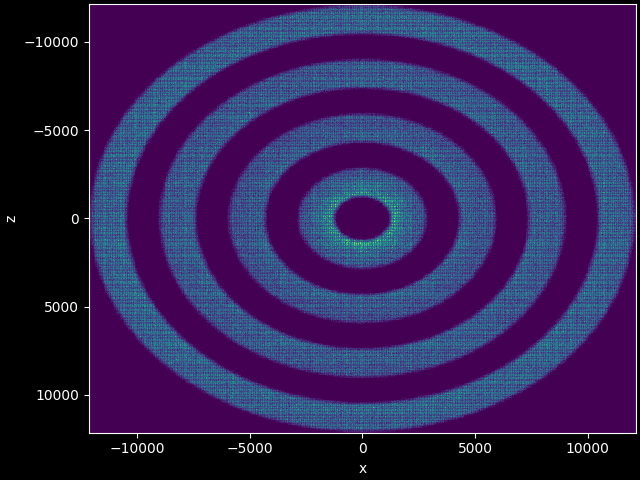

In [9]:
fig3, ax3 = mplt.xz_subplots()
ax2.set_title("Stronghold Generation Probability Heatmap")

ring_hist2d = ax3.hist2d(ring_map_1d.real, ring_map_1d.imag, bins=600)

mplt.flip_zaxis(ax3)

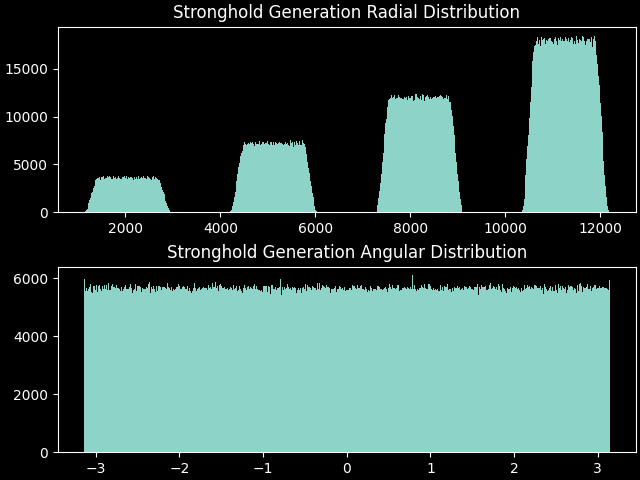

In [10]:
fig4, ax4 = plt.subplots(2, 1, constrained_layout=True)
ax4[0].set_title("Stronghold Generation Radial Distribution")
ax4[1].set_title("Stronghold Generation Angular Distribution")

ring_r, ring_phi = np.abs(ring_map_1d), np.angle(ring_map_1d)

ring_r_hist = ax4[0].hist(ring_r, bins=600)
ring_phi_hist = ax4[1].hist(ring_phi, bins=600)